In [33]:
# !pip install pycaret
import pycaret
pycaret.__version__

'3.1.0'

In [34]:
# load sample dataset from pycaret dataset module
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##### Setup
The `setup()` function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters, i.e. `data` and `target`. All the other parameters are optional.

In [35]:
# import pycaret regression and init setup
from pycaret.regression import *
s = setup(data, target= 'charges', session_id=123)

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


Once the setup has been successfully executed it shows the information grid containing experiment level information. 

- **Session id:**  A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions.<br/>
<br/>
- **Target type:**  Binary, Multiclass, or Regression. The Target type is automatically detected. <br/>
<br/>
- **Original data shape:**  Shape of the original data prior to any transformations. <br/>
<br/>
- **Transformed train set shape :**  Shape of transformed train set <br/>
<br/>
- **Transformed test set shape :**  Shape of transformed test set <br/>
<br/>
- **Numeric features :**  The number of features considered as numerical. <br/>
<br/>
- **Categorical features :**  The number of features considered as categorical. <br/>

PyCaret has two set of API's that you can work with. (1) Functional (as seen above) and (2) Object Oriented API.

With Object Oriented API instead of executing functions directly you will import a class and execute methods of class.

In [36]:
# import `RegressionExperiment()` class and initiate it
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

In [37]:
# check the `type()` of exp
type(exp)

pycaret.regression.oop.RegressionExperiment

In [38]:
# init `setup()` function on exp
exp.setup(data, target='charges', session_id=123)

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


##### Compare Models

In [39]:
# compare baseline models
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,07:43:55
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Linear Regression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2701.9919,23548657.1177,4832.9329,0.8320,0.4447,0.3137,0.0750
rf,Random Forest Regressor,2771.4583,25416502.3827,5028.6343,0.8172,0.4690,0.3303,0.1550
lightgbm,Light Gradient Boosting Machine,2992.1828,25521038.3331,5042.0978,0.8149,0.5378,0.3751,34.4410
et,Extra Trees Regressor,2833.3624,28427844.2412,5305.6516,0.7991,0.4877,0.3363,0.1240
ada,AdaBoost Regressor,4316.0568,29220505.6498,5398.4561,0.7903,0.6368,0.7394,0.0560
lar,Least Angle Regression,4303.5559,38388058.4578,6176.5920,0.7306,0.5949,0.4433,0.0390
llar,Lasso Least Angle Regression,4303.7694,38386824.2786,6176.4846,0.7306,0.5952,0.4434,0.0380
br,Bayesian Ridge,4311.2349,38391950.0874,6176.8896,0.7306,0.5910,0.4447,0.0460
ridge,Ridge Regression,4317.6984,38396435.9578,6177.2329,0.7306,0.5891,0.4459,0.0420
lasso,Lasso Regression,4303.7697,38386797.6709,6176.4824,0.7306,0.5952,0.4434,0.0400


In [9]:
# compare models using OOP, this step needs to run the `setup()` function first
# exp.compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:40:39
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2701.9919,23548657.1177,4832.9329,0.8320,0.4447,0.3137,0.0800
rf,Random Forest Regressor,2771.4583,25416502.3827,5028.6343,0.8172,0.4690,0.3303,0.1480
lightgbm,Light Gradient Boosting Machine,2992.1828,25521038.3331,5042.0978,0.8149,0.5378,0.3751,34.2150
et,Extra Trees Regressor,2833.3624,28427844.2412,5305.6516,0.7991,0.4877,0.3363,0.1210
ada,AdaBoost Regressor,4316.0568,29220505.6498,5398.4561,0.7903,0.6368,0.7394,0.0640
lar,Least Angle Regression,4303.5559,38388058.4578,6176.5920,0.7306,0.5949,0.4433,0.0430
llar,Lasso Least Angle Regression,4303.7694,38386824.2786,6176.4846,0.7306,0.5952,0.4434,0.0430
br,Bayesian Ridge,4311.2349,38391950.0874,6176.8896,0.7306,0.5910,0.4447,0.0410
ridge,Ridge Regression,4317.6984,38396435.9578,6177.2329,0.7306,0.5891,0.4459,0.0420
lasso,Lasso Regression,4303.7697,38386797.6709,6176.4824,0.7306,0.5952,0.4434,0.0440


GradientBoostingRegressor(random_state=123)

**Note**: Notice that the output between **functional** and **OOP API** is consistent. Rest of the functions in the current notebook will only be shown using **functional API** only.

##### Analyze Model

The `plot_model()` function is used to analyze the performance of a trained model on the **test set**. It may require re-training the model in certain cases. For example, if the model is a **bagging** technique or **boosting** technique and `plot_model()` is used without `ensemble=True` parameter, it will re-train the model using the original dataset.

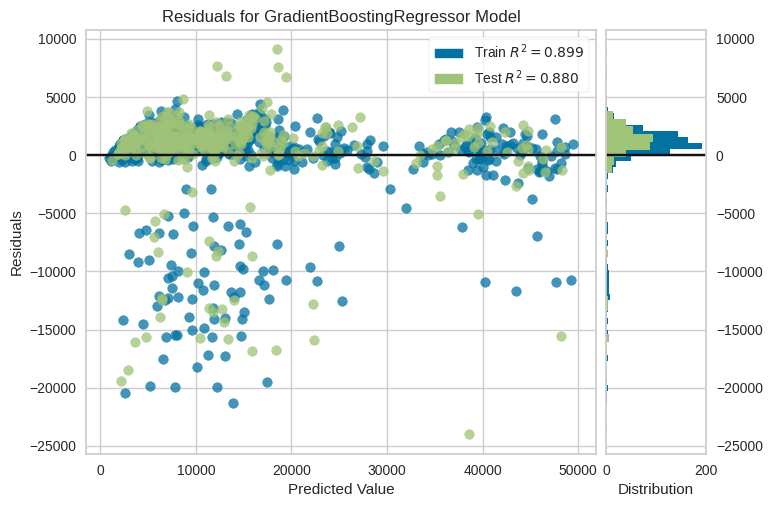

In [40]:
# plot residuals
plot_model(best, plot = 'residuals')

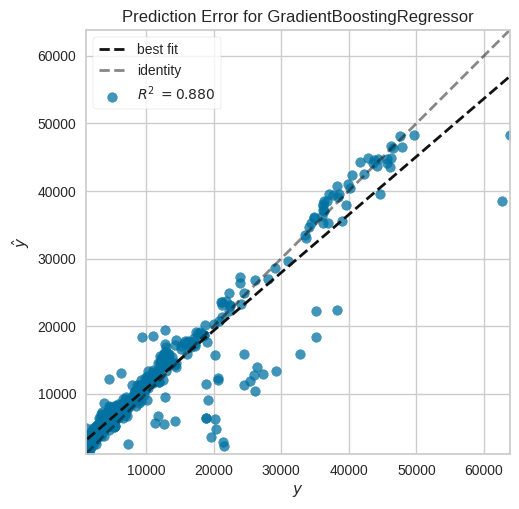

In [41]:
# plot error
plot_model(best, plot = 'error')

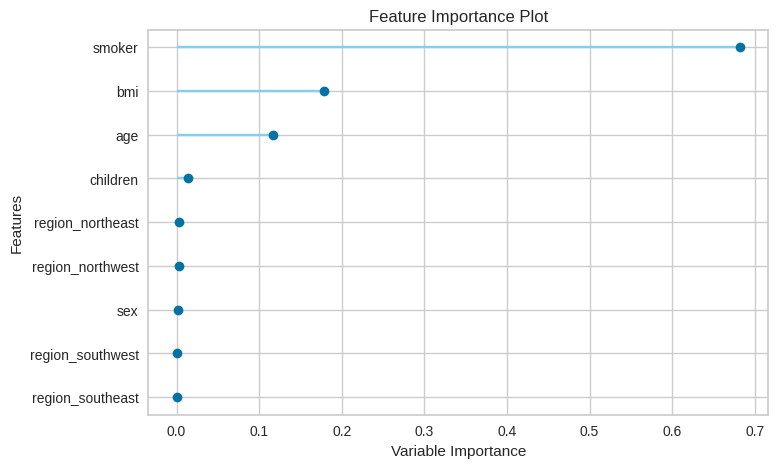

In [42]:
# plot feature importance
plot_model(best, plot = 'feature')

In [14]:
# check docstring to see available plots
# help(plot_model)

An alternative to `plot_model()` function is `evaluate_model()`. It can only be used in **Notebook** since it uses **IPython widgets**, currently, `ipywidget` library. However, the output of `evaluate_model()` is identical to `plot_model()`.

In [43]:
# evaluate_model() function to evaluate model on test dataset
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

##### Prediction

The `predict_model()` function returns `prediction_label` as new column to the input DataFrame. When data is `None` (default), it uses the **test set** (created during the `setup()` function stage) for **scoring**. However, if you are only interested in predictions (no scoring), you can pass `data` parameter with new unseen dataset to the `predict_model()` function.

In [44]:
# predict on test set
holdout_pred = predict_model(best)

In [45]:
# show predictions DataFrame (df)
holdout_pred.head()

,age,sex,bmi,children,smoker,region,charges,prediction_label
650,49,female,42.680000,2,no,southeast,9800.888672,10681.513104
319,32,male,37.334999,1,no,northeast,4667.607422,8043.453463
314,27,female,31.400000,0,yes,southwest,34838.871094,36153.097686
150,35,male,24.129999,1,no,northwest,5125.215820,7435.516853
336,60,male,25.740000,0,no,southeast,12142.578125,14676.544334


The same function works for predicting the **labels on unseen dataset**.

Let's create a copy of original data and drop the `charges`. We can then use the new data frame without labels for scoring.

In [46]:
# copy data and drop charges
new_data = data.copy()
new_data.drop('charges', axis=1, inplace=True)
new_data.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [47]:
# predict model on new_data
predictions = predict_model(best, data=new_data)
predictions.head()

,age,sex,bmi,children,smoker,region,prediction_label
0,19,female,27.900000,0,yes,southwest,18464.334448
1,18,male,33.770000,1,no,southeast,4020.345384
2,28,male,33.000000,3,no,southeast,6555.388388
3,33,male,22.705000,0,no,northwest,9627.045725
4,32,male,28.879999,0,no,northwest,3325.531292


---

##### Save Model

Finally, we can save the entire pipeline on disk for later use, using **pycaret's `save_model()` function**.

In [48]:
# save pipeline
save_model(best, 'insurance_gbr_model_23122020')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['sex', 'smoker'],
                                     transfor...
                                                                          'data_type': dtype('O'),
                                                                          'mapping': female    0
 male      1
 NaN      -1
 dtype: int64},
                                                                         {'col': 'smoker',
                                                                          'data_type': dtype(

##### Load Model

In [49]:
# load pipeline
loaded_best_pipeline = load_model('insurance_gbr_model_23122020')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWrapper(include=['sex', 'smoker...
                                                                         'data_type': dtype('O'),
                                                                         'mapping': female    0
male      1
NaN      -1
dtype: int64},
                                                                        {'col': 'smoker',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': no     0
yes    1
NaN   -1
dtype: int64}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['region'],
                                    transformer=OneHotEncoder(cols=['region'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('trained_model', GradientBoostingRegressor(random_state=123))])

##### Using JSON cache to persist requests

The purpose of this step is to helps us creating a `configmap.yaml` file for our next kubernetes resource configuration.

##### Setup a logic to do the following:

1. Imports the necessary libraries: `sys`, `os`, `json`, and `requests`.

2. Reads the incoming request from the command line using the `sys.argv` variable.

3. Creates a user request object with the role "user" and the content of the incoming request.

4. Creates a system request object with the role "system" and the user data.

5. Reads the cached user requests from the file `requests.json` if it exists.

6. Adds the new user request to the cached requests and writes the updated cached requests to the file `requests.json`.

7. Creates a list of requests, which includes the system request and all of the user requests.

8. Sends a "POST" request to the endpoint `http://0.0.0.0:8000/predict` with the user data and the header `Content-Type: application/json`.

9. Prints the response from the "POST" request.

10. A backend FastAPI `app.py` file that will be used to serve the model, should be up and running on the `http://localhost:8000/predict` endpoint, to test out our predicted model.

In [50]:
# Import libraries
import sys
import os
import json
import requests

# Import the `Request()` class from the requests library
from requests import Request

In [ ]:
# read the incoming requests

request = sys.argv[1]
user_request = {
    "role": "user",
    "content": request,
    "data": {
        "age": 32,
        "sex": "male",
        "bmi": 28.880,
        "children": 0,
        "smoker": True,
        "region": "southeast"
    }
}

# lets predict our results using the loaded pipeline

data = {
    "age": 32,
    "sex": "male",
    "bmi": 28.880,
    "children": 0,
    "smoker": True,
    "region": "southeast"
}

response = requests.post("http://127.0.0.1:8000/predict", json=data)
print(response.text)

systemRequest = {
    "role": "system",
    "content": user_request
}

# read the cached user requests if there are any

userRequests = []
if os.path.isfile('config.json'):
    with open('config.json', 'r') as requestsFile:
        data = requestsFile.read()
        userRequests = json.loads(data)
        
# add the new request to it and update the cached requests

userRequests.append(user_request)
with open('config.json', 'w') as requestsFile:
    msgJSON = json.dumps(userRequests)
    requestsFile.write(msgJSON)
    print(msgJSON)
    
# create a list of requests

requests = []
for request in user_request:
    # create a Request object
    request = Request()
    request.url = "http://0.0.0.0:5000/predict"
    request.method = "POST"
    request.headers = {"Content-Type": "application/json"}
    request.data = json.dumps(user_request)

# send the requests and get the responses
responses = []
for request in requests:
    # Call the post() method on the individual request object.
    response = requests.post(request)
    responses.append(response)
    
    requests.append(systemRequest)
    requests.extend(userRequests)

# print the response text for each response
for response in responses:
    print(response.text)


## Detailed **function-by-function** overview is described in the next `mlflow - Pycaret Integration` notebook :)